In [123]:
# Import the required libraries
import torch
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import pytesseract
from collections import OrderedDict


0: 352x640 1 ingredients, 23.4ms
Speed: 8.4ms preprocess, 23.4ms inference, 8.6ms postprocess per image at shape (1, 3, 352, 640)


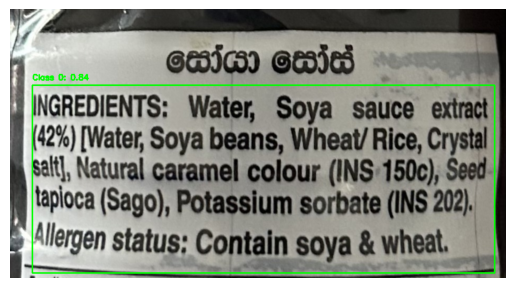

In [124]:
# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Load the model
model = YOLO('best.pt')

# Load the image
img_path = r"F:\University\2_Year_02\2_Year_02_Sem1\Data Science Group Project\8_DataSet\zz_Dataset_Anotated\in963.jpg"
img = cv2.imread(img_path)

# Perform object detection
results = model(img)

# Check if any bounding boxes were detected
if not any(result.boxes for result in results):
    print("Ingredient list not detected.")
else:
    # Draw bounding boxes
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
            conf = box.conf[0].item()  # Confidence score
            cls = int(box.cls[0].item())  # Class index
            label = f'Class {cls}: {conf:.2f}'

            # Draw rectangle
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Convert BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

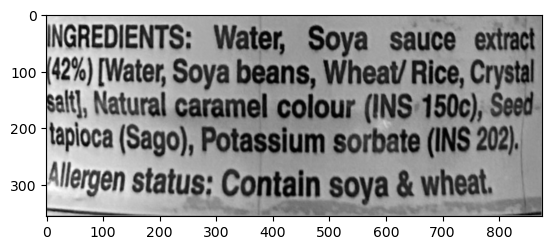

ingredient_names = ["ingredients water", "soya sauce extract 42 water", "soya beans", "wheat rice", "crystal salt", "natural caramel colour ins 150", "seed taploca sago", "potassium sorbate ins 202  llergen status contain soya  wheat "]


In [125]:
# List to store extracted ingredient names with their bounding boxes
ingredient_boxes = []

# Extract text from each bounding box
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates

        # Crop the image to the bounding box
        cropped_img = img[y1:y2, x1:x2]
        
        # Preprocess the cropped image for better OCR results
        # 1. Convert to grayscale
        cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2GRAY)
        
        # Display the cropped image (for debugging purposes)
        plt.imshow(cropped_img, cmap='gray')
        plt.show()
        
        # Use Tesseract to extract text from the cropped image
        # Configure Tesseract for better text extraction
        custom_config = r'--oem 3 --psm 6 -l eng'
        extracted_text = pytesseract.image_to_string(cropped_img, config=custom_config)

        # Process the extracted text
        if extracted_text:
            # Replace newline characters with spaces
            extracted_text = extracted_text.replace('\n', ' ')

            # Split the text by common separators
            words = extracted_text.replace(';', ',').split(',')

            for word in words:
                # Clean up the text (remove special characters and normalize)
                cleaned_text = ''.join(e for e in word.strip().lower() if e.isalnum() or e.isspace())

                # Add the cleaned text and bounding box to the list
                if cleaned_text:  # Only add non-empty text
                    ingredient_boxes.append((y1, x1, cleaned_text))

# Sort the ingredient boxes by y-coordinate first, then by x-coordinate
ingredient_boxes.sort(key=lambda b: (round(b[0] / 10), b[1]))  # Grouping by 10 pixels in y

# Extract the sorted text while preserving order and removing duplicates
ingredient_names = list(OrderedDict.fromkeys([text for (_, _, text) in ingredient_boxes]))

# Format the output as a single line list
formatted_output = 'ingredient_names = [' + ', '.join(f'"{ingredient}"' for ingredient in ingredient_names) + ']'

# Print the formatted output
print(formatted_output)

In [126]:
detected_ing = formatted_output
print(detected_ing)

ingredient_names = ["ingredients water", "soya sauce extract 42 water", "soya beans", "wheat rice", "crystal salt", "natural caramel colour ins 150", "seed taploca sago", "potassium sorbate ins 202  llergen status contain soya  wheat "]


In [127]:
detected_ing = formatted_output
print(detected_ing)

# Need to loop through the detected ingredients and compare with the dataset
# replace the detected ingredients with the dataset ingredients with the most similar name
# If there is no matching remove it.

# Load the dataset
import pandas as pd

dataset_path = r"C:\Users\nelis\Desktop\Ingredient_cleaned.csv"

dataset = pd.read_csv(dataset_path)

ingredient_names = ["ingredients water", "soya sauce extract 42 water", "soya beans", "wheat rice", "crystal salt", "natural caramel colour ins 150", "seed taploca sago", "potassium sorbate ins 202  llergen status contain soya  wheat "]


matched_ingredient_names = ["water", "soybeans", "rice", "salt", "caramel", "sago", "potassium sorbate"]


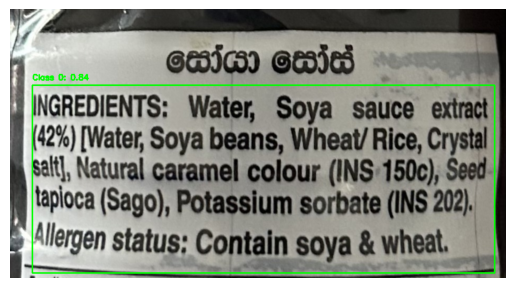

In [129]:
from fuzzywuzzy import process
import pandas as pd

# Example detected_ing (replace this with your actual formatted_output)
detected_ing = formatted_output

# Extract the list of detected ingredients
detected_ingredients = eval(detected_ing.split('=')[1].strip())

# Load the dataset
dataset_path = r"C:\Users\nelis\Desktop\Ingredient_cleaned.csv"
dataset = pd.read_csv(dataset_path)

# Ensure the dataset has a column named 'ingredient'
if 'ingredient' not in dataset.columns:
    raise ValueError("Dataset must contain a column named 'ingredient'.")

# Get the list of valid ingredients from the dataset
valid_ingredients = dataset['ingredient'].tolist()

# List to store matched ingredients
matched_ingredients = []

# Threshold for fuzzy matching (adjust as needed)
MATCH_THRESHOLD = 70

# Loop through detected ingredients and find the best match
for ingredient in detected_ingredients:
    # Find the best match using fuzzywuzzy
    match, score = process.extractOne(ingredient, valid_ingredients)
    
    # If the match score is above the threshold, replace the detected ingredient
    if score >= MATCH_THRESHOLD:
        matched_ingredients.append(match)
    else:
        print(f"No match found for '{ingredient}'. Removing from the list.")

# Remove duplicates while preserving order
matched_ingredients = list(OrderedDict.fromkeys(matched_ingredients))

# Format the matched ingredients as a single line list
formatted_matched_ingredients = 'matched_ingredient_names = [' + ', '.join(f'"{ingredient}"' for ingredient in matched_ingredients) + ']'

# Print the final matched ingredients
print(formatted_matched_ingredients)

# Display the image with bounding boxes and matched ingredients
# Convert BGR to RGB for displaying with matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()